### Assignment 4

#### Olga Iarygina

In this assignment, we are supposed to, firstly, explore a few datasets with PCA and then perform clustering. As usual, I start by importing the necessary packages. I decided to write all the PCA and clustering things on my own, so I use only NumPy and matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# a bit larger figures
plt.rcParams['figure.figsize'] = [9, 7.5]
plt.rcParams['figure.dpi'] = 100

#### ex1 :: plotting cell shapes

In the first task, I use diatoms data to explore how do the algae cells look like. After loading the data, I first visualize just one cell by plotting the landmark points. I do not use scatterplot here since we are asked to interpolate between these landmarks.

In [2]:
diat = np.loadtxt('diatoms.txt')

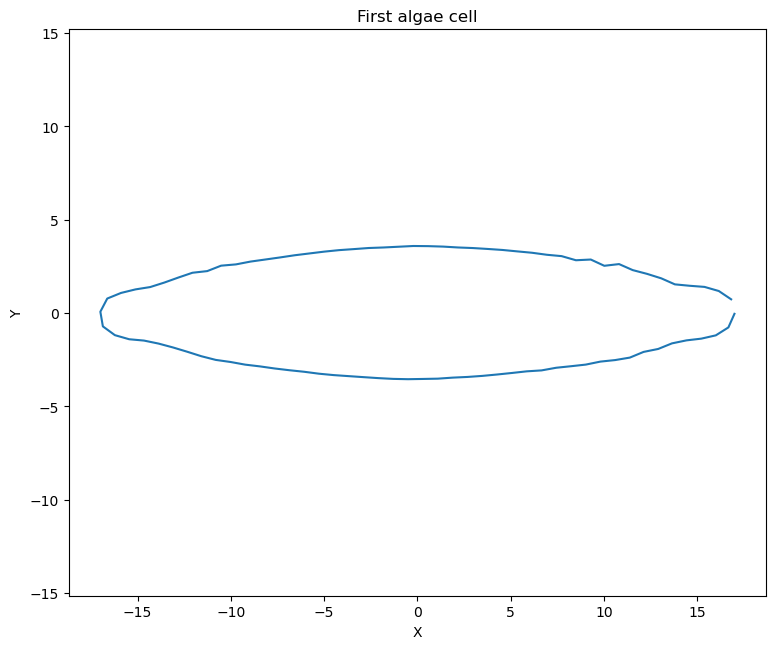

In [3]:
x = diat[0, ::2]
y = diat[0, 1::2]

plt.plot(x, y)

plt.title('First algae cell')
plt.xlabel('X')
plt.ylabel('Y')

plt.axis('equal');

Then we move to plot the cells onto one another, and I just iterate over the data to do it. 

What I can see is that we have probably three types of diatoms, where (1) the first one is circular, (2) the second is elongated, as we saw in the previous graph with one cell. And for (3) the latter, the 'edges' seem to, kind of, rise a little bit, but I am not sure how relevant it is to single it out as a separate type.

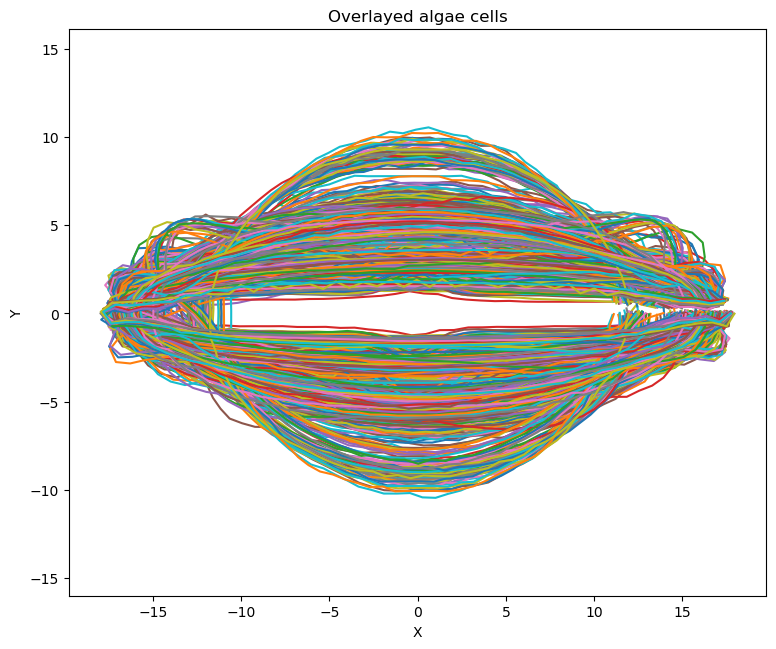

In [4]:
for i in range(len(diat)):

    x = diat[i, ::2]
    y = diat[i, 1::2]

    plt.plot(x, y)
    
    plt.title('Overlayed algae cells')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    plt.axis('equal');

#### ex2 :: visualizing varianve in visual data

Then we move to see how does the variance of the cells looks like in space. For this, I plot some examples of the first three principal components.

Thus, for each principal component, I want to go, firstly, two standard deviations left, then one standard deviation left, and then with a step of one standard deviation, I slightly move to 2SD on the right.

Obviously, to get principle components, I first have to perform PCA. So I just use the PCA function I wrote in the previous assignment.

In [5]:
def pca(data):
    
    cov = np.cov(data, rowvar = False) # covariance matrix
    eig_val, eig_vec = np.linalg.eigh(cov) # eigenvectors and eigenvalues
    
    sort = np.argsort(eig_val)[::-1] # sorting
    sort_eig_val = eig_val[sort]
    sort_eig_vec = eig_vec[:, sort]
    
    return sort_eig_val, sort_eig_vec

And then, I create a function that calculates all the stuff with standard deviations from the assignment. We put our data in this function to get the mean, eigenvectors and eigenvalues. And the index of the principal component, I need to plot further.

In [6]:
def variance(data, ind):
    
    evals, evecs = pca(data)
    
    mean = np.mean(data, axis = 0)
    sd = np.sqrt(evals[ind])
    
    x = [-2, -1, 0, 1, 2]
    cells = []
    
    for i in x:
        cell = mean + (i * sd) * evecs[:, ind]
        cells = np.append(cells, cell)
    
    cells.shape = (5, len(evals)) # here I set the right shape to the resulting array
    # I probably do it in a stupid way, but the logic is that we have 5 different variants of adding SD
    
    return cells

Actually, it gets the values for five cells. All of them I further plot on the one plot, where the gradient indicates the temporal development. The sequences of cells show the variance.

I do it for each of the principal components separately, and we see that the variation is much smaller for the second and third principal components. Hence, the first one captures most of the variance.

I also get the cmap, as it was stated in the assignment.

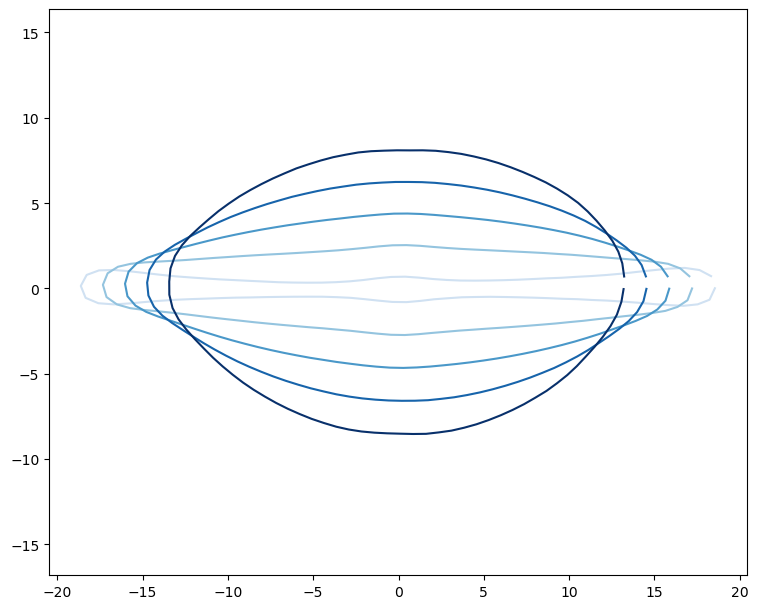

In [7]:
blues = plt.get_cmap('Blues')

pc1 = variance(diat, ind = 0)

for i in range(len(pc1)):
    x = pc1[i, ::2]
    y = pc1[i, 1::2]
    plt.plot(x, y, c = blues((i + 1)/5))
    plt.axis("equal")

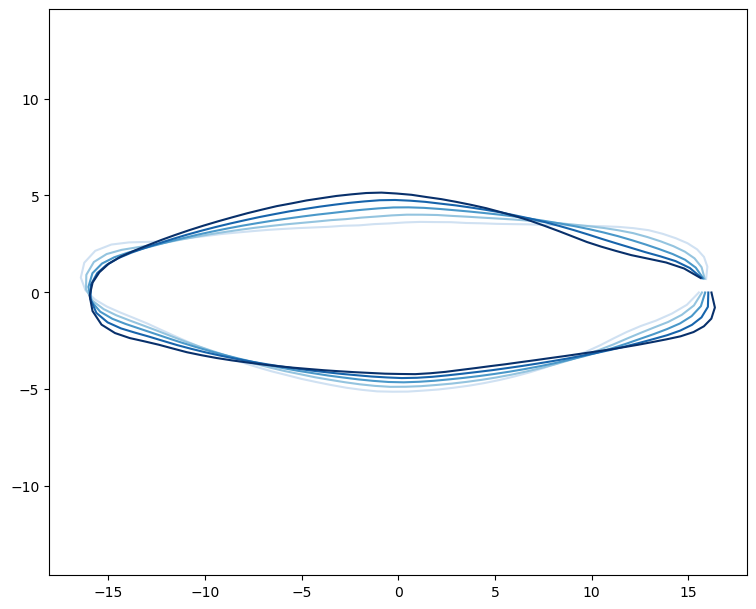

In [8]:
pc2 = variance(diat, ind = 1)

for i in range(len(pc2)):
    x = pc2[i, ::2]
    y = pc2[i, 1::2]
    plt.plot(x, y, c = blues((i + 1)/5))
    plt.axis("equal")

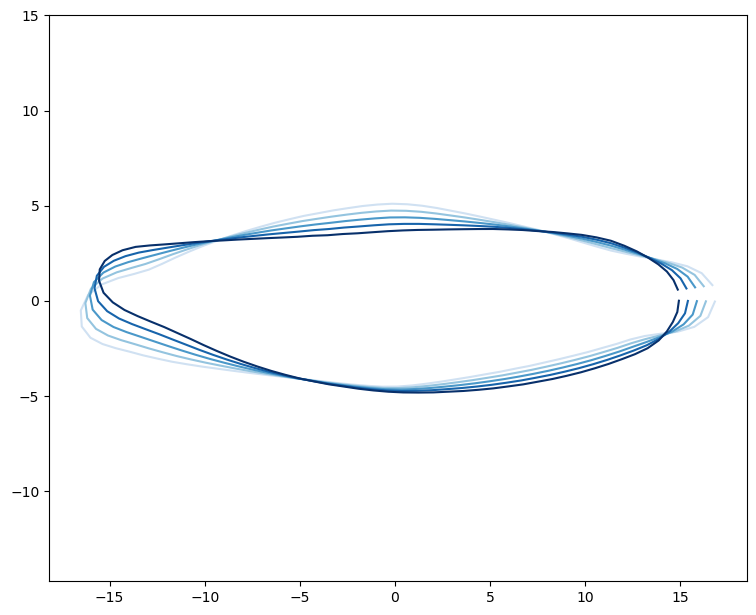

In [9]:
pc3 = variance(diat, ind = 2)

for i in range(len(pc3)):
    x = pc3[i, ::2]
    y = pc3[i, 1::2]
    plt.plot(x, y, c = blues((i + 1)/5))
    plt.axis("equal")

#### ex3 :: critical thinking

##### a) theory

Let's assume that before performing PCA, we decided to make some preprocessing. There are a few ways to do it, out of which the centring looks appropriate but actually not needed. Why? Because when we calculate the covariance matrix, it performs centring implicitly, as the variance is an average squared deviation from the mean of the data. Hence, by giving PCA non-centered and centred data, we will get the same results.

Talking about standardization, we are actually supposed to use it because in performing principal component analysis, we want to reveal those components that maximize the variance. And different scales may influence the result a lot. Because if, for example, we will compare something in which components scales vary differently, like weight and height, measured in kilograms and metres correspondingly, the direction of maximal variance will be definitely more strongly consistent with weight. And therefore, change in one measurement may be seen as more important than in another, which may lead to interpretation mistakes. Thus, we need standardization (which is actually rescaling the features to have standard normal distribution).

We cannot use whitening because whitening, as I understand it, is removing the correlation form the data. And for example, if the data is first elongated, we will have just projections that look like white noise after whitening. While PCA is based on correlations, and we want to see the global structure of the dataset. So, uncorrelated and noisy data is definitely not appropriate for PCA.

##### b) dramatic difference

In this task, we work with the toy dataset and want to see whether the last 2 points of the data make a dramatic difference in the visualisation of projections. I firstly run PCA on the whole dataset and project it with the MDS function. I copied the implementation of the MDS function from the previous assignment.

In [10]:
toy = np.loadtxt('pca_toy_data.txt')

In [11]:
def mds(data, d):

    cov = np.cov(data, rowvar = False) # here I just use the same code I used in PCA function
    evals, evecs = np.linalg.eigh(cov)

    evals = evals[::-1]  # then I use the code for selecting dimensions from pca_lecture_handout
    evecs = evecs[:, ::-1]

    p_comp = evecs[:, :d]

    mat = data @ p_comp  # here we get the dot product

    return mat

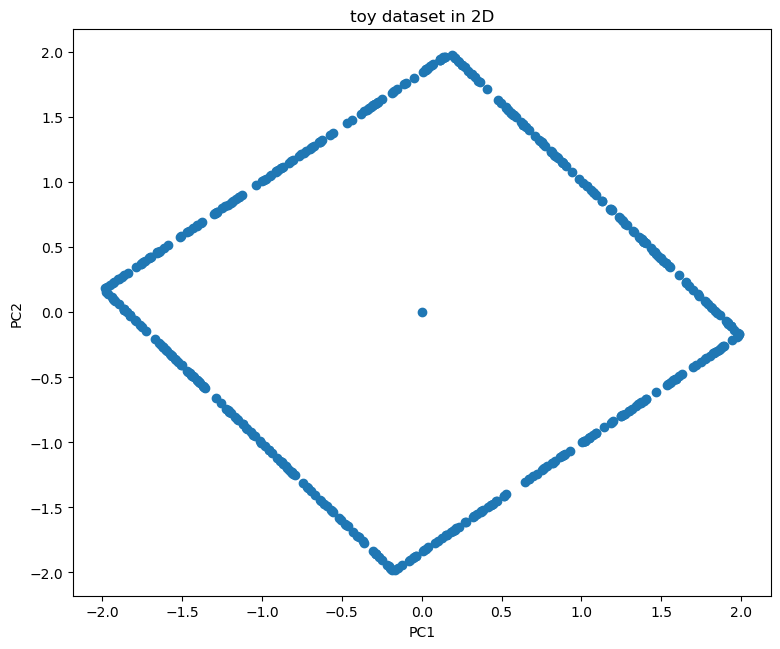

In [12]:
toy_pest = mds(toy, 2)

plt.scatter(toy_pest[:, 0], toy_pest[:, 1])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("toy dataset in 2D")

plt.show()

We see an interesting rectangular shape here with a point in the middle. What are these last two points responsible for?

Then I leave out the two last data points from the dataset and repeat the procedure above. Actually, I would not say that the difference is dramatic. The last two points (or only one of them?) were projected in the centre of the rectangle. And now, we do not see this point in the middle.

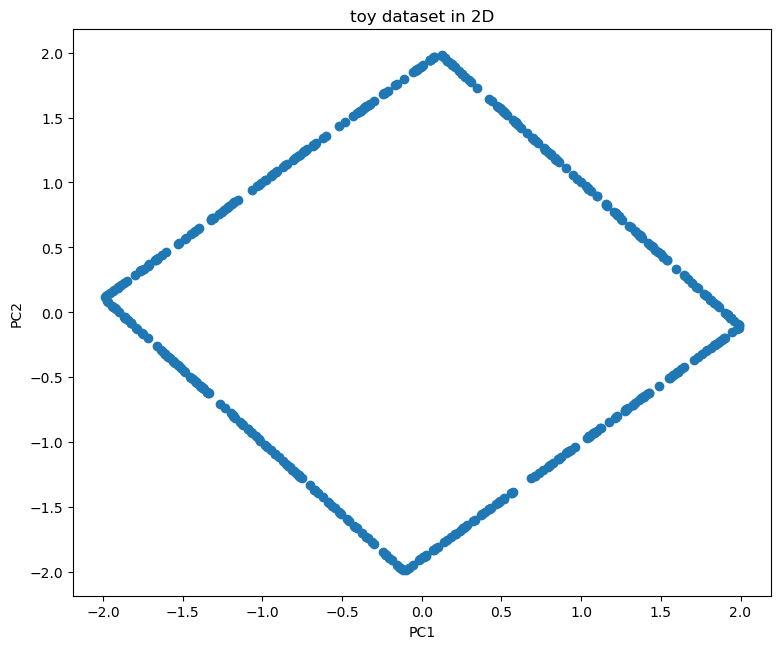

In [13]:
toy_pest = mds(toy[:-2], 2)

plt.scatter(toy_pest[:, 0], toy_pest[:, 1])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("toy dataset in 2D")

plt.show()

#### ex4 :: clustering II

The second part of the assignment is devoted to clustering. In this exercise, I plot the Weed data by projecting int onto the first PCs, as we did in the previous assignment.

In [14]:
weeds = np.loadtxt('IDSWeedCropTrain.csv', delimiter = ',')

XTrain = weeds[:, :-1] 
YTrain = weeds[:, -1] 

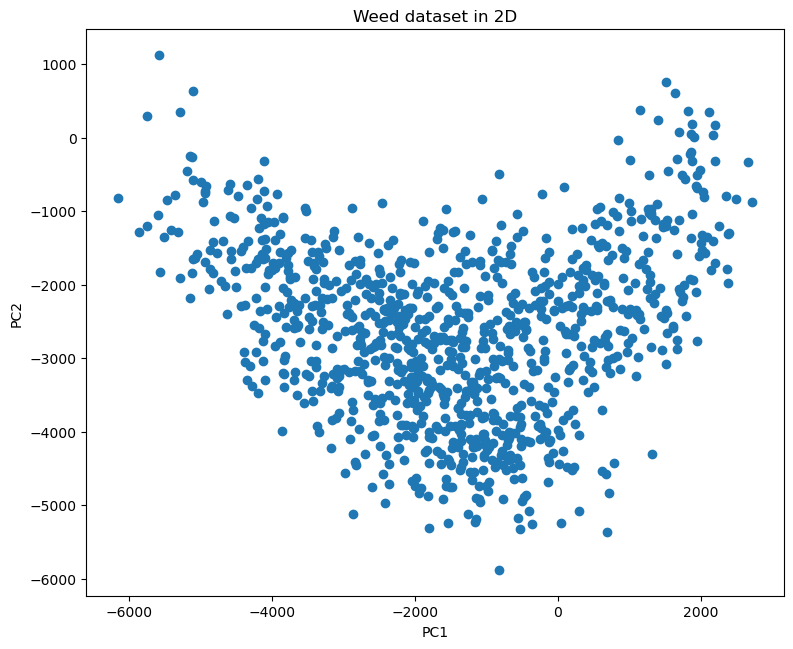

In [15]:
data_weed = mds(XTrain, 2)

plt.scatter(data_weed[:, 0], data_weed[:, 1])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Weed dataset in 2D")

plt.show()

Then I perform k-means clustering to get the centres of the clusters and corresponding classes. I use the k-means function I wrote in the previous assignment, but now I add the returning of classes in the output to be able to visualise them. After clustering, I visualise all: classes and cluster centres projected onto the first two principal components on the single plot.

In [16]:
startingPoint = np.vstack((XTrain[0 ,] ,XTrain[1 ,]))

def kmeans(data, n_clusters, max_iter = 100):
    
    centroids = startingPoint # initialize centroids
    
    for i in range(max_iter):
        
        cluster = np.array([np.argmin([np.dot(x - y, x - y) for y in centroids]) for x in data])  # assign the clusters

        centroids = [data[cluster == l].mean(axis = 0) for l in range(n_clusters)] # compute the new centroid
        
    return np.array(centroids), np.array(cluster) # return cluster centroids and cluster labels

In [17]:
data_centers, data_clusters = kmeans(XTrain, 2)

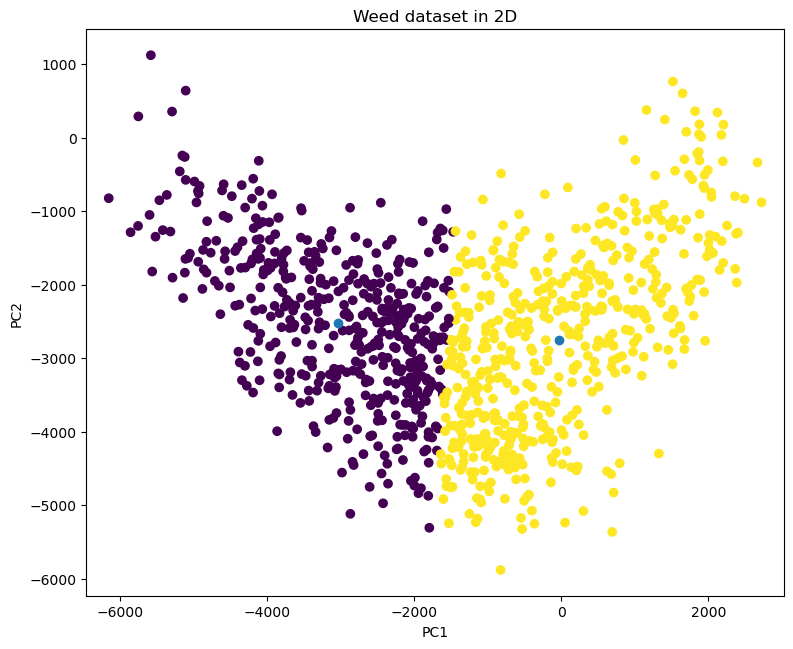

In [18]:
data_weed = mds(XTrain, 2)

group = data_clusters

projected = np.dot(data_centers, pca(XTrain)[1][:, :2])

plt.scatter(data_weed[:, 0], data_weed[:, 1], c = data_clusters)
plt.scatter(projected[:, 0], projected[:, 1])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Weed dataset in 2D")

plt.axis('equal')

plt.show()

Clusters look pretty meaningful for me. The cluster centres seem to be really more or less in the centre, and the separation is almost in the centre of the spread of the data points. Since the projected data look almost symmetrical, the separation in the centre makes sense.

#### ex5 :: clustering III

In Exercise 5, I actually repeat all the procedure from Exercise 4, but with the different Occupancy dataset. For k-means, I reinitialise the starting point since the dataset is new.

In [19]:
occ = np.loadtxt('occupancy_data.csv', delimiter = ',')
occ = occ[:, :-1] 

In [20]:
startingPoint = np.vstack((occ[0 ,], occ[1 ,]))

In [21]:
occ_centers, occ_clusters = kmeans(occ, 2)

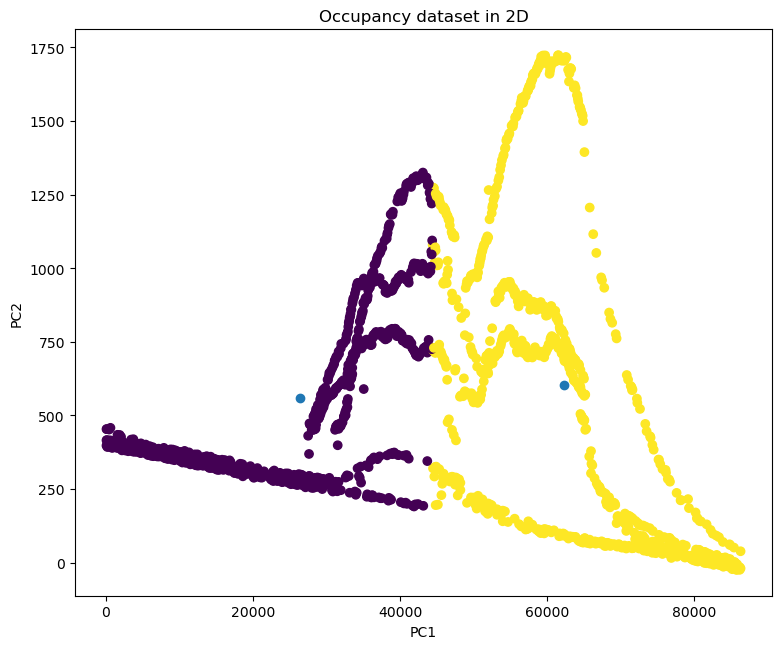

In [22]:
data_occ = mds(occ, 2)

group = occ_clusters

projected = np.dot(occ_centers, pca(occ)[1][:, :2])

plt.scatter(data_occ[:, 0], data_occ[:, 1], c = occ_clusters)
plt.scatter(projected[:, 0], projected[:, 1])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Occupancy dataset in 2D")

plt.show()

I would say that the clusters make sense again. However, in this case, I think they could be different. I do not know whether it would be any sense in terms of interpreting the data cause it is hard to see looking just at this graph, but this straight double-line of points in the bottom could be one cluster, and these curvy lines above could be a second one. Again, I have no idea which separation is more meaningful here.

#### ex6 :: Virtual Chocolate Box (why is this task named so?)

I performed this exercise with 3D visualisation just to test my skills and learn something new. I do not make the plot interactive since my computer is dying while rotating it. I just projected occupancy data onto the three first PCs to see the global structure of the dataset, as well as visualised classes and cluster centres.

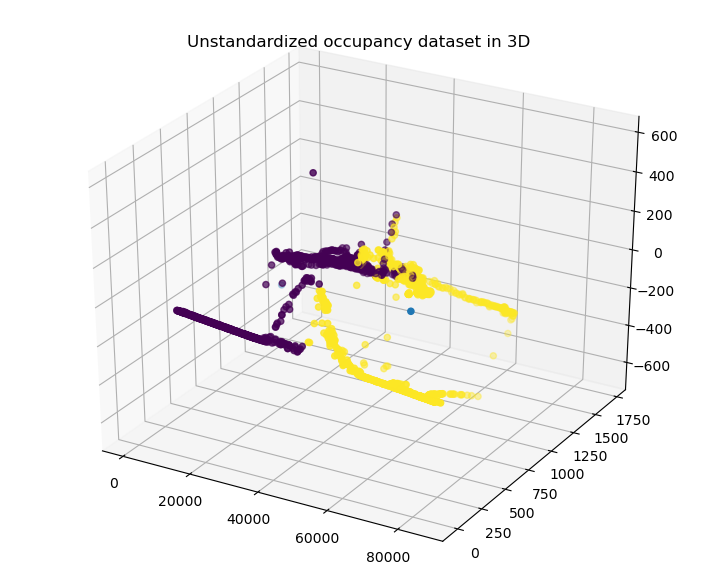

In [23]:
from mpl_toolkits import mplot3d

proj_occ = mds(occ, 3)

occ_centers, occ_clusters = kmeans(occ, 2)
projected = np.dot(occ_centers, pca(occ)[1][:, :2])

fig = plt.figure()
ax = plt.axes(projection = '3d')

plt.title('Unstandardized occupancy dataset in 3D')

ax.scatter3D(proj_occ[:, 0], proj_occ[:, 1], proj_occ[:, 2], c = occ_clusters)

ax.scatter3D(projected[:, 0], projected[:, 1])

Wow, now I see that I would separate the cluster completely differently cause there is such a lot of space between a group of points in the front and in the back. It looks like the most meaningful separation is to assign the front points and back points to 2 different clusters, which I would never say looking at the 2D plot. If I saw such a mess on the 2D plot, I would say that k-means works badly. Very interesting!